<h1>AIML CA1 Regression</h1>
<h2>Predicting Hospital Cost</h2>

<h5>Name : Rejey Ezekiel Jeyakumar
</br>Class : DAAA/FT/1B/01
</br>Admin No. : 2348935</h5>

<hr>

<h5><b>The objectives of this assignment are to:</b></h5>
<ol>
<li>Explore the given dataset,<i> credit_dataset.csv</i>, and try to gain insights from it.</li>
<li>Build a classification model to predict whether a customer will default payment in the next month, in order to better manage risk for a bank.</li>
</ol>

<h5><b>Background Info:</b></h5>
A bank has collected data on it's customers, such as their age, gender, level of education, credit limit, payment and bill history. From this data, the bank would like to predict if a customer would default on their bill in the upcoming month, in a attempt to mitigate risk taken. If a customer is predicted to default on their bill, the bank can take action to mitigate the risk, such as reducing the credit limit of the customer, or contacting the customer to remind them to pay their bill.

<h5><b>Additional Info:</b></h5>
A default is a missed or multiple missed payments on money that you have borrowed. An example of a default would be not paying your credit card bill or your monthly mortgage payment. (Investopedia, 2023)

Potential Reasons for Defaulting:
<ol>
<li>Customer does not have high income, does not have money to repay</li>
</ol>

</br>
<hr>
<h3>Importing Libraries</h3>
<hr></hr>

In [68]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from warnings import filterwarnings
import scipy.stats as ss

# SKLEARN Libraries
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import TransformedTargetRegressor

# Model Selection
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

# Models
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.dummy import DummyRegressor

# Pickle Library = Saving Models
import pickle

<h3>1. Loading Dataset</h3>

In [69]:
#Loading Dataset
df = pd.read_csv('CA1-Regression-Dataset.csv')

#View Dataset
df.head()

,ID,Age,Gender,BMI,Smoker,Region,Cost ($)
0,1,19,female,27.900,yes,southwest,16884.92400
1,2,18,male,33.770,no,southeast,1725.55230
2,3,28,male,33.000,no,southeast,4449.46200
3,4,33,male,22.705,no,northwest,21984.47061
4,5,32,male,28.880,no,northwest,3866.85520


<hr></hr>
<h3>Exploratory Data Analysis</h3>
<hr></hr>

<li><b>ph:</b> lol</li>


1. Seeing the outline of the dataset.
<hr></hr>

In [70]:
#View the size of the dataset and the columns.
print(f'Shape of the Column: {df.shape}')

Shape of the Column: (1338, 7)


In [71]:
#View the features of the dataset
print(f'Columns of Dataset: {df.columns}')

Columns of Dataset: Index(['ID', 'Age', 'Gender', 'BMI', 'Smoker', 'Region', 'Cost ($)'], dtype='object')


In [72]:
# Getting info of the dataset
print('The Information about the Dataset')
df.info()

The Information about the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   Age       1338 non-null   int64  
 2   Gender    1338 non-null   object 
 3   BMI       1338 non-null   float64
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Cost ($)  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From this we can see that we have 3 objects inside our dataset. 

In [73]:
#Viewing the count, mean , standard deviation and many more key information.
df.describe()

,ID,Age,BMI,Cost ($)
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,13270.422265
std,386.391641,14.049960,6.098187,12110.011237
min,1.000000,18.000000,15.960000,1121.873900
25%,335.250000,27.000000,26.296250,4740.287150
50%,669.500000,39.000000,30.400000,9382.033000
75%,1003.750000,51.000000,34.693750,16639.912515
max,1338.000000,64.000000,53.130000,63770.428010


Our Target for this dataset is Cost ($)

f:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


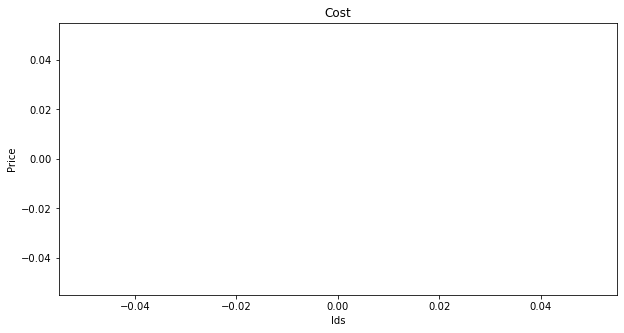

In [74]:
plt.figure(figsize=(10,5))
plt.title('Cost')
plt.xlabel('Ids')
plt.ylabel('Price')
sns.scatterplot(df['Cost ($)'])
plt.show()

In [75]:
df = df.drop(["ID"], axis=1)
df.head()

,Age,Gender,BMI,Smoker,Region,Cost ($)
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


<b>Analysis after viewing the outline of the dataset</b>
<li>The shape of the dataset is (1338, 7) showing that there are 1338 data points, and 7 Columns.In the 7 Columns there are 6 Features and 1 Target Variable being Price.</li>

In [76]:
#from this we can see the total number of missing data
print(f'Missing Values in dataset (Amount):\n{pd.isnull(df).sum()}\n')
print(f"Total Missing Values: {(pd.isnull(df).sum()).sum()}")

Missing Values in dataset (Amount):
Age         0
Gender      0
BMI         0
Smoker      0
Region      0
Cost ($)    0
dtype: int64

Total Missing Values: 0


We can see that there is no missing data.

<h4>Univariate Analysis</h4>

We will begin with a univariate analysis, analysing the distribution of each variable.

<h5>Distribution of numerical features</h5>

We will plot and see the distribution of the different numerical variables and how it relates to Price. To do this, we have a function to plot a distribution plot.
<hr></hr>

In [77]:
# Function to plot a bar chart of a numerical feature against the price

def plot_barplot(df, col):
    
    # Figure size
    plt.figure(figsize=(12, 7))
    
    # Bar plot
    sns.barplot(data=df, x=col, y='Cost ($)')
    
    # Title
    plt.title(f'Barplot of {col} vs Cost ($)')
    
    # Show plot
    plt.show()

In [78]:
# Function to plot a regression plot of a numerical feature against the price

def plot_regplot(df, col):
    
    # Figure size
    plt.figure(figsize=(12, 7))
    
    # Regression plot
    sns.regplot(data=df, x=col, y='Cost ($)')
    
    # Title
    plt.title(f'Scatterplot of {col} vs Cost ($)')
    
    # Show plot
    plt.show()

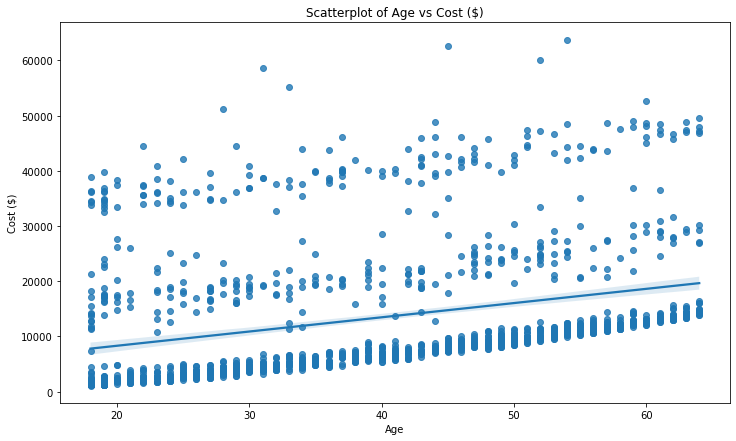

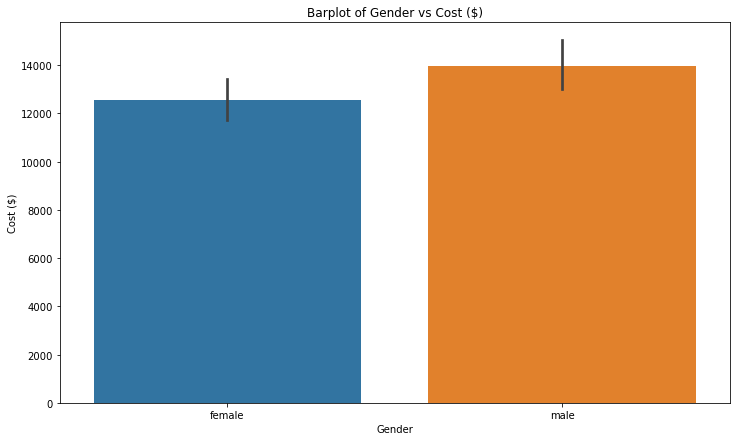

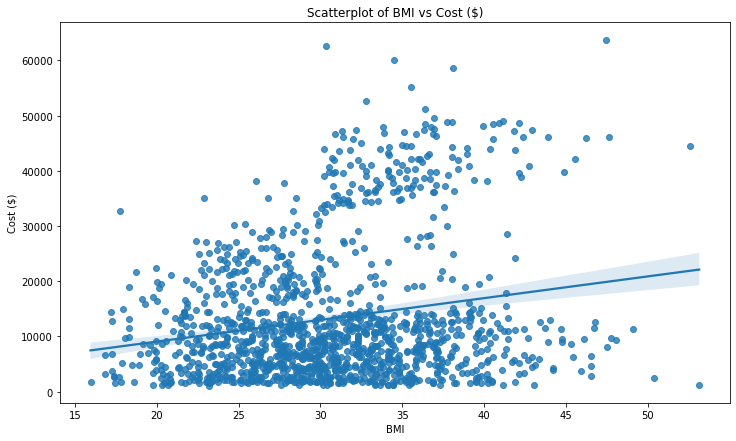

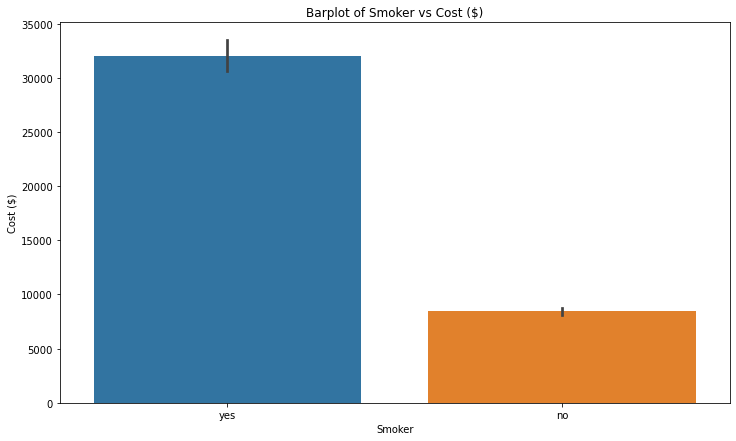

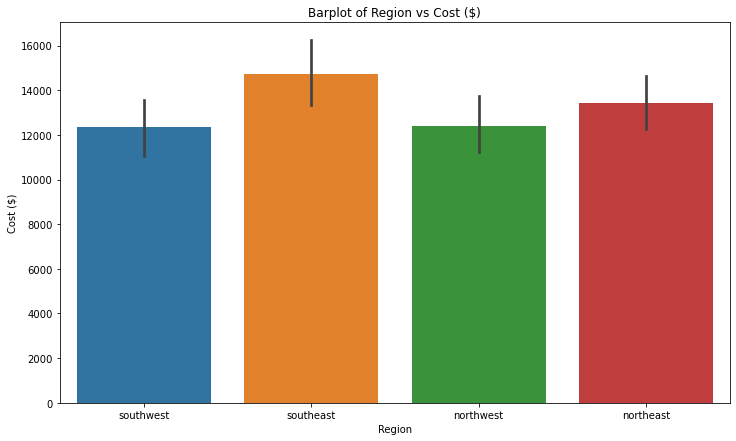

In [79]:
# Iterate through columns of the DataFrame
for col in df.columns[0:5]:
    # Check if the column is numerical
    if pd.api.types.is_numeric_dtype(df[col]):
        plot_regplot(df, col)
    else:
        plot_barplot(df, col)

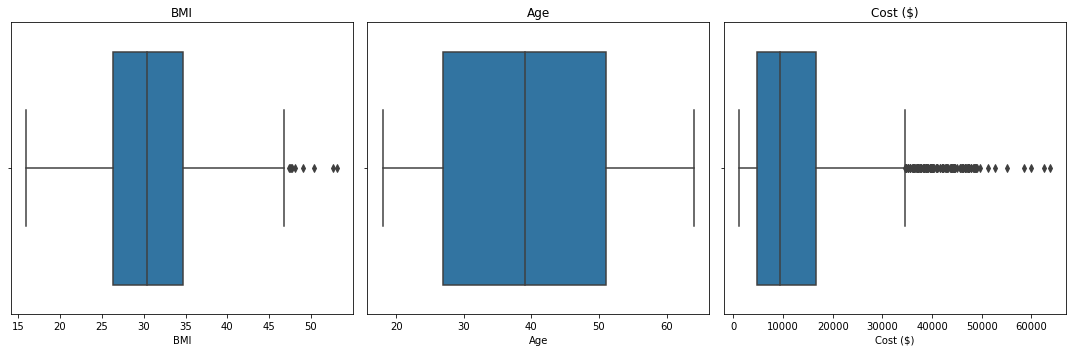

In [80]:
columns = ['BMI','Age','Cost ($)']
# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Flatten the 3x3 array of subplots into a 1D array
axes = axes.flatten()

# Plot each boxplot on a separate subplot with a different y-axis
for i,col in enumerate(columns,start=0):
    sns.boxplot(x=df[col], ax=axes[i]).set(title=col)


# Remove any empty subplots
for i in range(3, 3):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

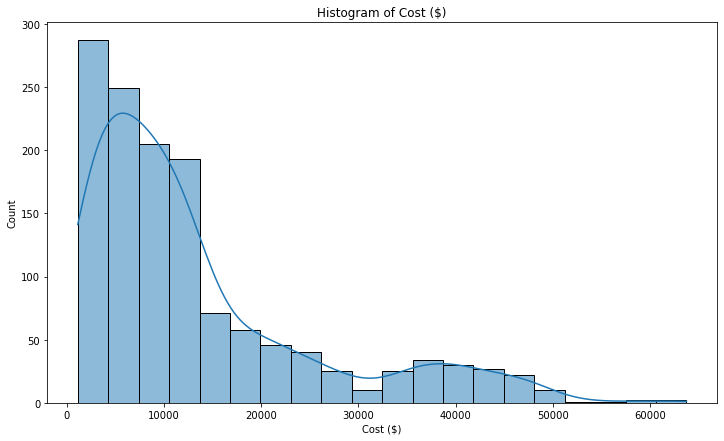

In [81]:
# Histplot of price
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Cost ($)', kde=True, bins=20)
plt.title('Histogram of Cost ($)')
plt.show()


<h5>Bivariate Analysis</h5>

We will now analyse the relationships between the different variables.

<h5>Cramér's V Correlations</h5>

Cramér's V is an association measure for categorical variables. The coefficient ranges from 0 to 1, with 0 indicating independence and 1 indicating perfect association. We use this over Pearson's correlation coefficient as Pearson's correlation coefficient is only applicable for numerical variables, while we have a large amount categorical variables in our dataset.
   
The formula for calculating Cramér's V correlation coefficient is:

$$V = \sqrt{\frac{\chi^2}{n \cdot \min(k-1, r-1)}}$$

In [82]:
# Calculating the correlation
import scipy.stats as ss  


def cramers_corrected_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

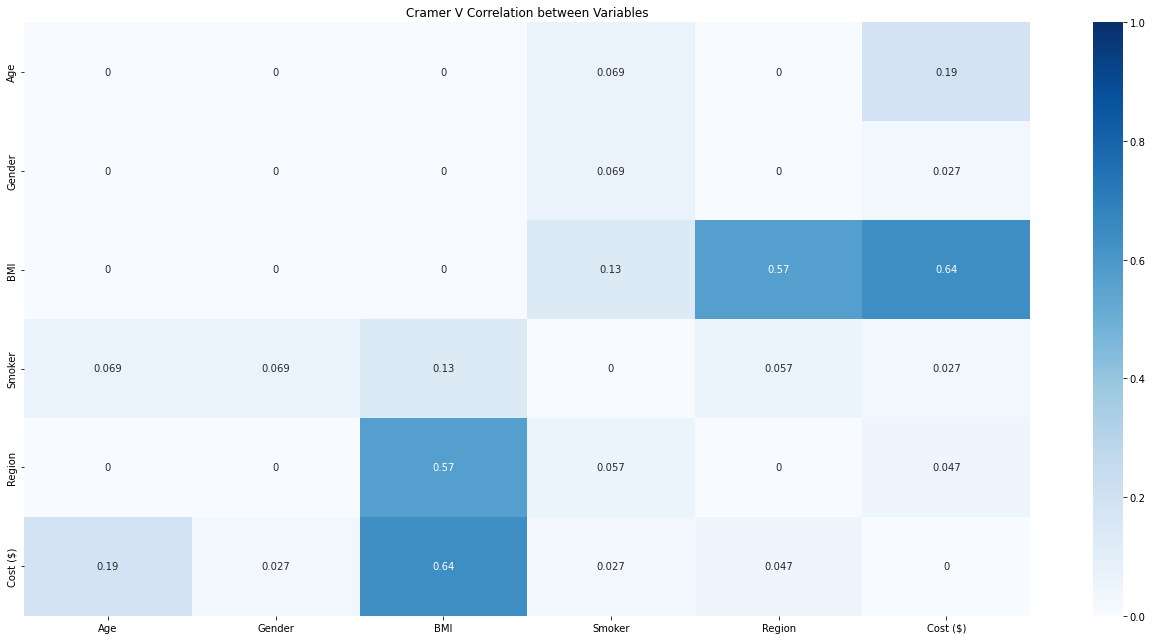

In [83]:
# Get all the columns in the dataset
import itertools
cols = list(df.columns)

# Generate empty correlation matrix
corrM = np.zeros((len(cols), len(cols)))

# Calculate the correlation matrix using the cramers_corrected_stat function
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

# Generating heatmap
corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(18, 9), tight_layout=True)
ax = sns.heatmap(corr, annot=True, ax=ax, vmin=0, vmax=1, cmap="Blues")
ax.set_title("Cramer V Correlation between Variables")
plt.show()

<hr></hr>
<h3>Data Preperation</h3>
<hr></hr>
Splitting Data into X and y.

In [84]:
X, y = df.drop("Cost ($)", axis=1), df["Cost ($)"]

In [85]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Copy the training data 
X_training = X_train.copy()

<hr></hr>
<h3>Data Preprocessing and Feature Engineering</h3>
<hr></hr>

Feature engineering for BMI with Underweight,overweight, obease and acceptable BMI.

ref: https://www.cdc.gov/obesity/basics/adult-defining.html#:~:text=Adult%20Body%20Mass%20Index&text=If%20your%20BMI%20is%20less,falls%20within%20the%20obesity%20range.

In [86]:
# Overweight But no 
X_training['UnderWeight'] = (X_training['BMI'] < 18.5)

# Total number of rooms
X_training['OverWeight'] = (X_training['BMI'] >= 25) & (X_training['BMI'] < 30)

# Total number of rooms
X_training['Obease'] = (X_training['BMI'] > 30)

# Verify new features
X_training.head()

,Age,Gender,BMI,Smoker,Region,UnderWeight,OverWeight,Obease
560,46,female,19.95,no,northwest,False,False,False
1285,47,female,24.32,no,northeast,False,False,False
1142,52,female,24.86,no,southeast,False,False,False
969,39,female,34.32,no,southeast,False,False,True
486,54,female,21.47,no,northwest,False,False,False


In [87]:
from sklearn.preprocessing import OneHotEncoder
# Encoder
enc = OneHotEncoder(drop= 'first')

# Declare categorical columns
cat_cols = [
    "Gender",
    "Region",
    "Smoker"
]

for col in cat_cols:
    # Fit the encoder
    enc.fit(X_training[[col]])
    
    # Transform and add new columns
    X_training = pd.concat(
        [
            X_training,
            pd.DataFrame(
                enc.transform(X_training[[col]]).toarray(),
                columns=enc.get_feature_names_out([col]),
                index=X_training.index,
            ),
        ],
        axis=1,
    )
    
    # Drop old column
    X_training.drop(col, axis=1, inplace=True)
    
# Verify new columns
X_training.head()

,Age,BMI,UnderWeight,OverWeight,Obease,Gender_male,Region_northwest,Region_southeast,Region_southwest,Smoker_yes
560,46,19.95,False,False,False,0.0,1.0,0.0,0.0,0.0
1285,47,24.32,False,False,False,0.0,0.0,0.0,0.0,0.0
1142,52,24.86,False,False,False,0.0,0.0,1.0,0.0,0.0
969,39,34.32,False,False,True,0.0,0.0,1.0,0.0,0.0
486,54,21.47,False,False,False,0.0,1.0,0.0,0.0,0.0


In [88]:
# Standard Scaler
scaler = StandardScaler()

# Declare numeric columns
num_cols = [
    "Age",
    "BMI"
]

# Scale the numerical columns
scaler.fit(X_training[num_cols])

# Transform the training data
X_training[num_cols] = scaler.transform(X_training[num_cols])

# Verify transformation
X_training.head()

,Age,BMI,UnderWeight,OverWeight,Obease,Gender_male,Region_northwest,Region_southeast,Region_southwest,Smoker_yes
560,0.472227,-1.756525,False,False,False,0.0,1.0,0.0,0.0,0.0
1285,0.543313,-1.033082,False,False,False,0.0,0.0,0.0,0.0,0.0
1142,0.898745,-0.943687,False,False,False,0.0,0.0,1.0,0.0,0.0
969,-0.025379,0.622393,False,False,True,0.0,0.0,1.0,0.0,0.0
486,1.040918,-1.504893,False,False,False,0.0,1.0,0.0,0.0,0.0


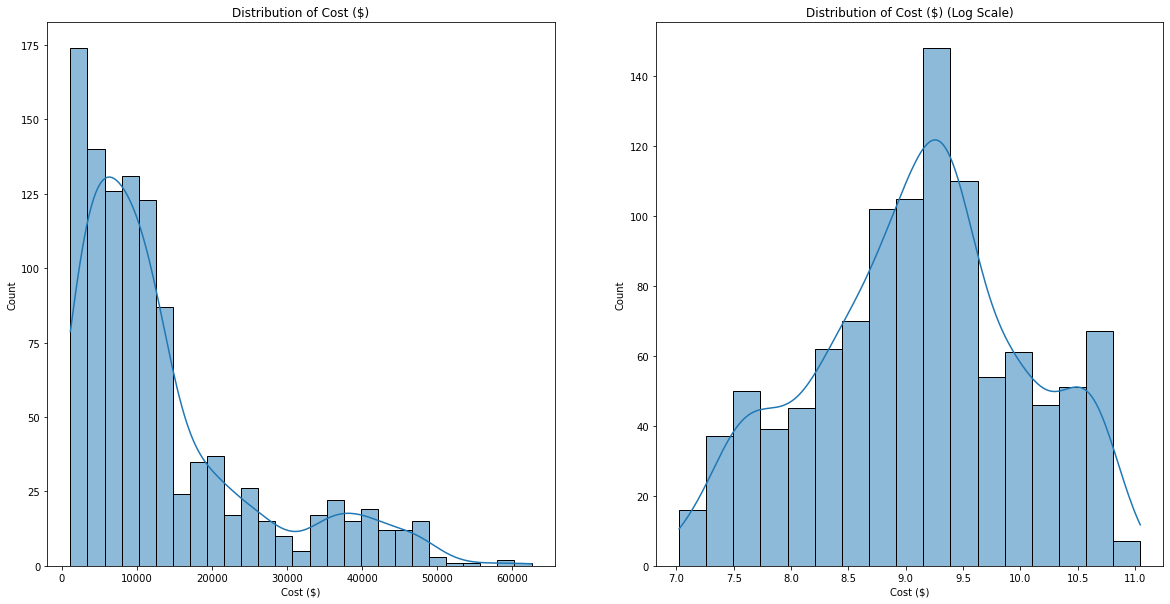

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(y_train, kde=True, ax=ax[0])
ax[0].set_title("Distribution of Cost ($)")
sns.histplot(y_train.apply(np.log1p), kde=True, ax=ax[1])
ax[1].set_title("Distribution of Cost ($) (Log Scale)")
plt.show()

In [90]:
# Scoring metrics
scoring_metrics = [
    "r2",
    "neg_root_mean_squared_error",
    "neg_mean_absolute_error"
]

In [91]:
# Total number of rooms
def UnderWeight(df):
    df['UnderWeight'] = (df['BMI'] < 18.5)
    return df
    
# Bedrooms per story
def OverWeight(df):
    df['OverWeight'] = (df['BMI'] >= 25) & (df['BMI'] < 30)
    return df

# Toilets per story
def Obease(df):
    df['Obease'] = (df['BMI'] > 30)
    return df

# Preprocessing steps
categorical_transformer = Pipeline([("encoder", OneHotEncoder())])

numeric_transformer = Pipeline([("scaler", StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", categorical_transformer, cat_cols),
        ("numeric", numeric_transformer, num_cols),
    ],
    remainder="passthrough",
)

# Pipeline steps
steps = [
    ("UnderWeight", FunctionTransformer(UnderWeight)),
    ("OverWeight", FunctionTransformer(OverWeight)),
    ("Obease", FunctionTransformer(Obease)),
    ("preprocessor", preprocessor),
    ("model")
]

STEP_LEN = len(steps) - 1

In [129]:
print(steps)

[('UnderWeight', FunctionTransformer(func=<function UnderWeight at 0x000001C946A074C0>)), ('OverWeight', FunctionTransformer(func=<function OverWeight at 0x000001C945F08820>)), ('Obease', FunctionTransformer(func=<function Obease at 0x000001C945F08EE0>)), ('preprocessor', ColumnTransformer(remainder='passthrough',
                  transformers=[('categorical',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['Gender', 'Region', 'Smoker']),
                                ('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'BMI'])])), ('model', TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=DummyRegressor()))]


In [92]:
# Function to plot learning curves for a model

def plot_learning_curve(
    model,
    X,
    y,
    scoring,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    ax=None,
):
    
    # Get model name
    try:
        model_name = type(model[-1].regressor).__name__
    except:
        try:
            model_name = type(model[-1]).__name__
        except:
            model_name = type(model).__name__
            
    # Create plot if ax is not passed
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        model,
        X,
        y,
        cv=cv,
        n_jobs=-1,
        train_sizes=train_sizes,
        return_times=True,
        scoring=scoring,
    )
    
    # Calculate mean of scores
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # Plot learning curve
    ax.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    ax.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    
    # Formatting
    ax.legend(loc="best")
    ax.set(
        ylim=(
            min(np.nanmin(train_scores), np.nanmin(test_scores)) - 0.01,
            max(np.nanmax(train_scores), np.nanmax(test_scores)) + 0.01,
        )
    )
    
    # Setting labels
    ax.set_title(f"Learning Curve of {model_name}")
    ax.set_ylabel(f"{scoring}")
    ax.set_xlabel("Train Sizes")
    return ax

In [93]:
# Initiate Regressors with default parameters
models = [
    ("LinearRegression", LinearRegression()),
    ("AdaBoostRegressor", AdaBoostRegressor()),
    ("GradientBoostingRegressor", GradientBoostingRegressor()),
    ("RandomForestRegressor", RandomForestRegressor()),
    ("KNeighborsRegressor", KNeighborsRegressor()),
    ("DecisionTreeRegressor", DecisionTreeRegressor()),
    ("ExtraTreesRegressor", ExtraTreesRegressor()),
    ("Ridge", Ridge()),
    ("KernelRidge", KernelRidge()),
    ("ElasticNet", ElasticNet()),
    ("Lasso", Lasso()),
    ("HistGradientBoostingRegressor", HistGradientBoostingRegressor()),
]

In [94]:
def select_model(X_train, y_train, models, scoring, ax):
    
    # Placeholder for the results
    out = []
    
    # Iterate through models
    for name, model in models:
        
        # Create a pipeline with the model and preprocessing steps
        steps[STEP_LEN] = (
            name,
            TransformedTargetRegressor(
                regressor=model, func=np.log1p, inverse_func=np.expm1
            ),
        )
        temp_pipeline = Pipeline(steps=steps)
        if ax is not None:
            plot_learning_curve(
                temp_pipeline,
                X_train,
                y_train,
                scoring="r2",
                cv=5,
                ax=ax[models.index((name, model)) % 4, models.index((name, model)) // 4],
            )
            
        # Cross validate the model
        score = cross_validate(
            temp_pipeline,
            X_train,
            y_train,
            scoring=scoring,
            n_jobs=3,
            cv=5,
            return_train_score=True,
        )
        
        # Calculate the average score across all the folds
        out.append(pd.Series(score, name=name).apply(np.mean))
        
    return pd.DataFrame(out)


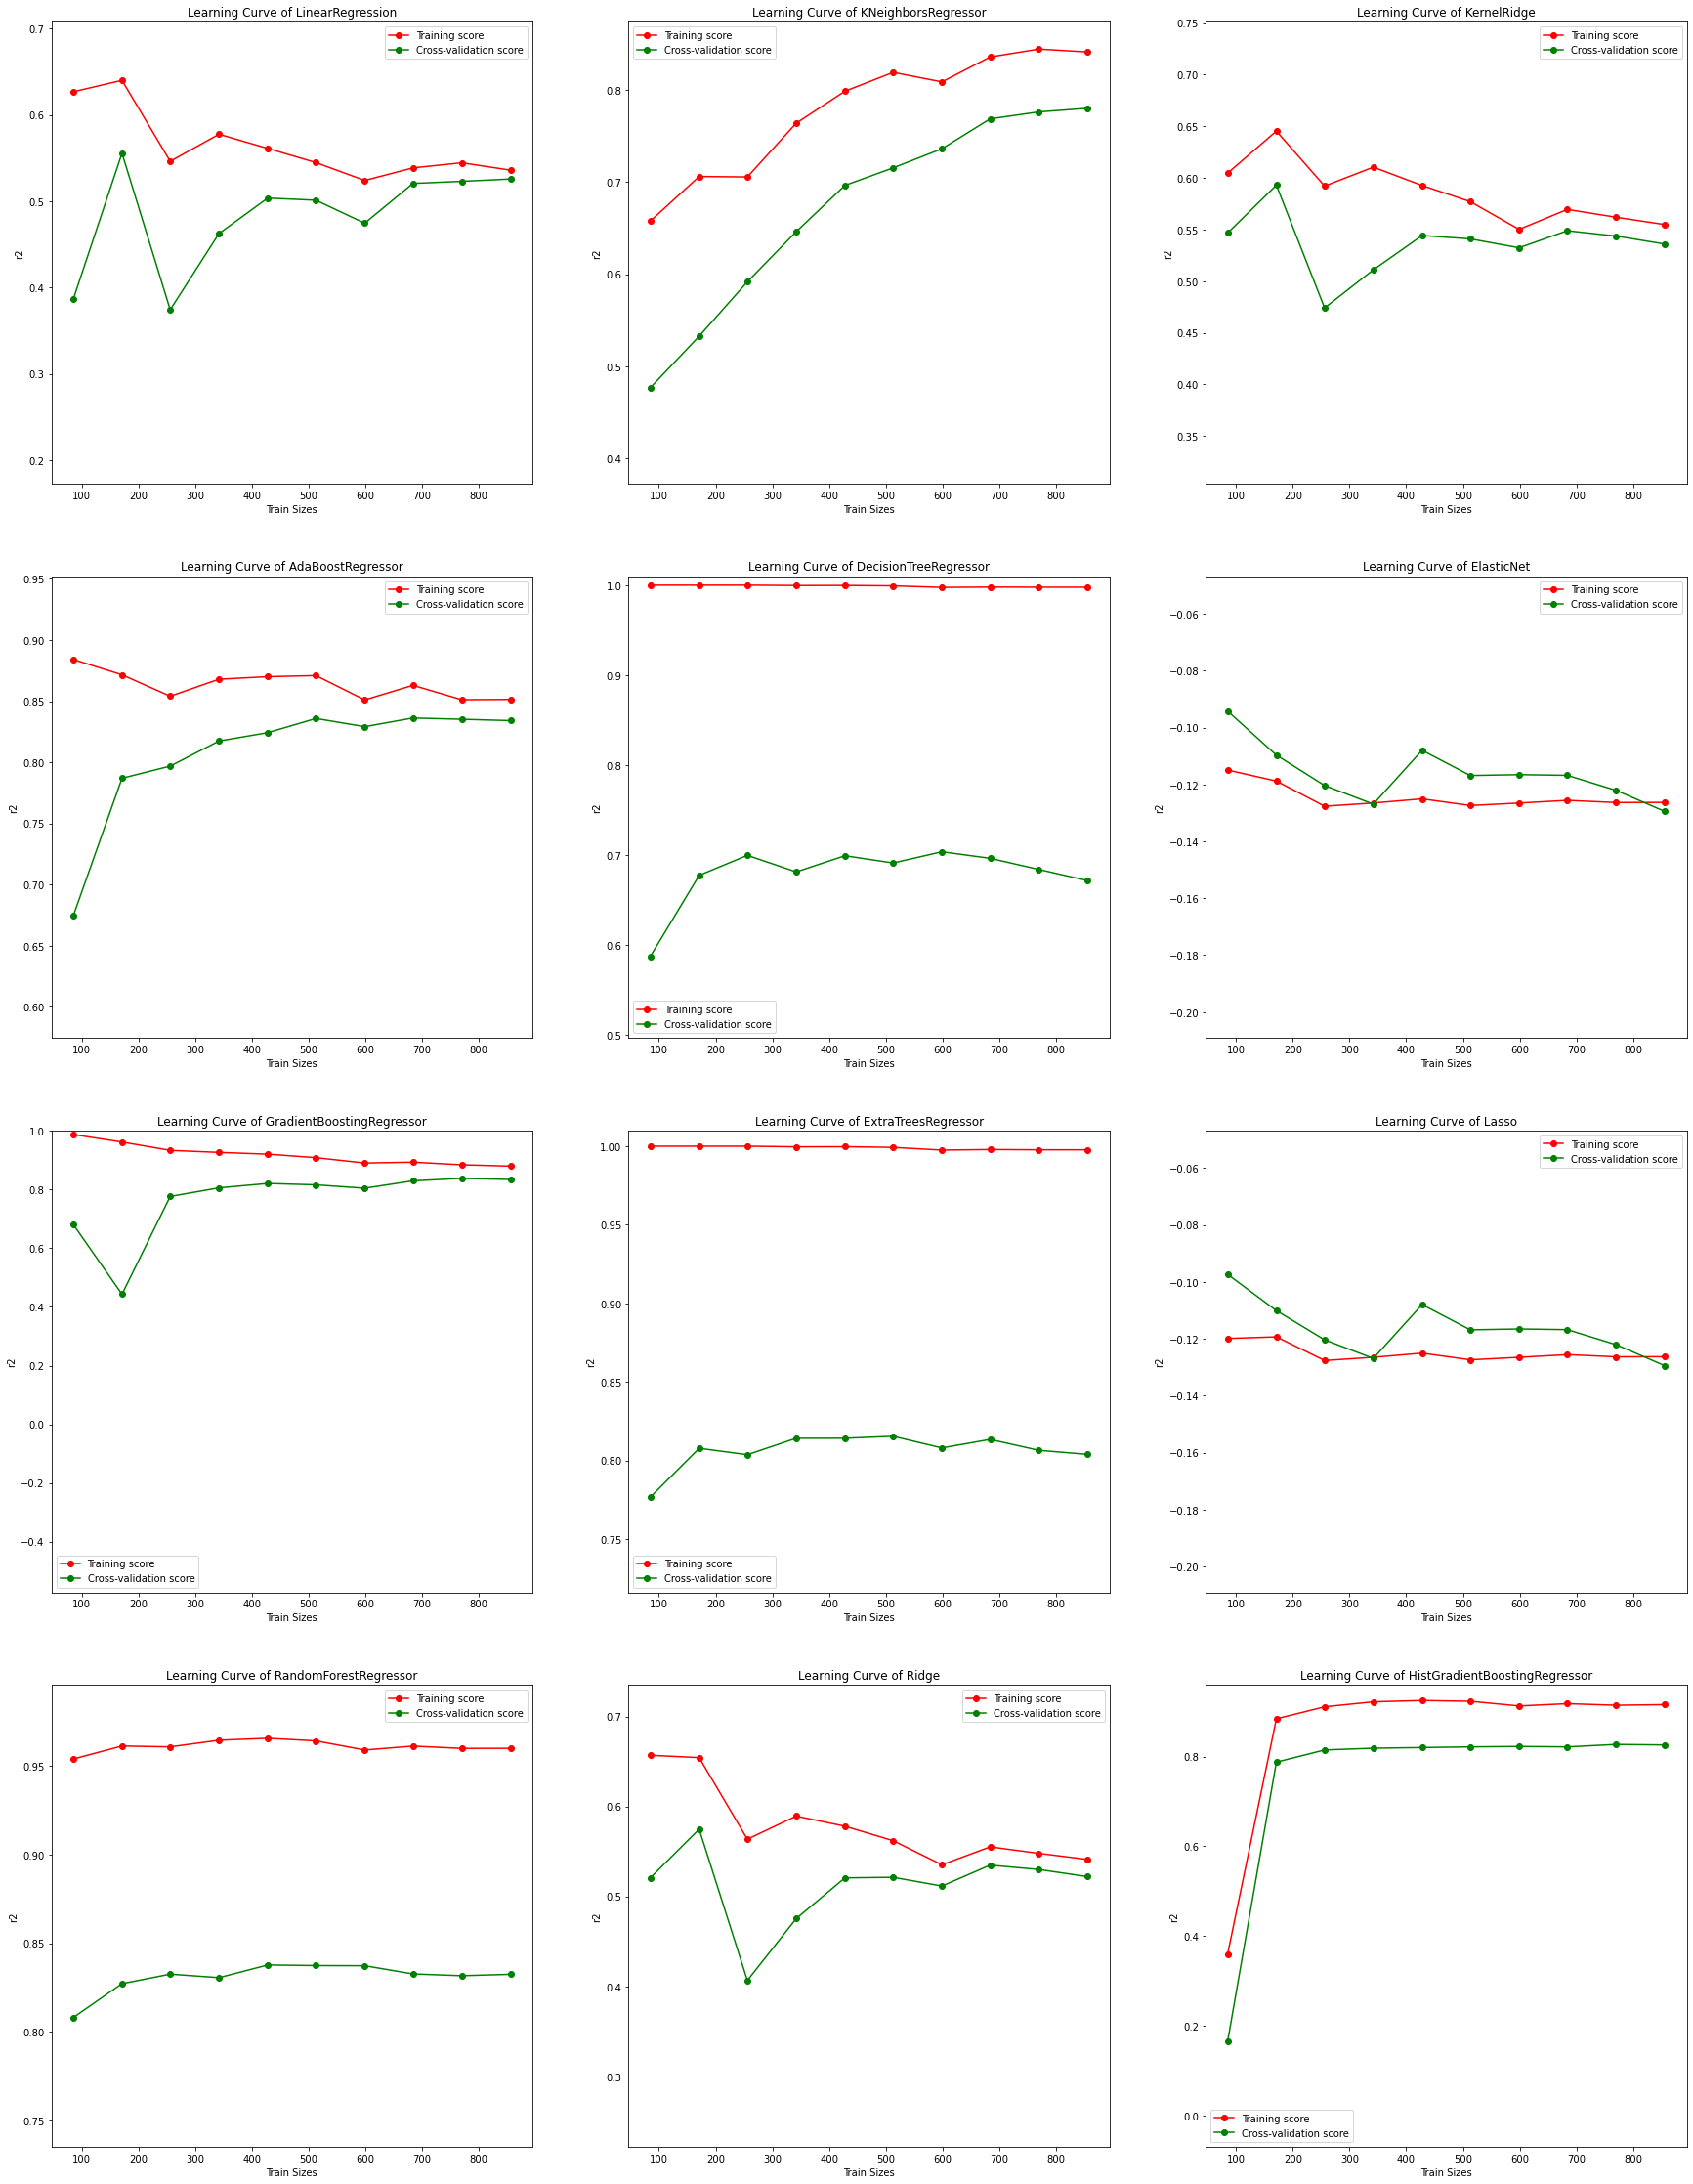

In [95]:
# Comparing the 12 learning curves
fig, ax = plt.subplots(4, 3, figsize=(30, 40))

model_scores = select_model(X_train, y_train, models, scoring_metrics, ax)
plt.show()

In [96]:
# Accessing the scorings
model_scores.style.apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.min()]
).apply(
    lambda x: [
        "background-color: green; color: white" if v else "" for v in x == x.max()
    ]
)

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
LinearRegression,0.012212,0.005404,0.507024,0.526617,-8373.304041,-8261.166502,-4427.605428,-4367.546848
AdaBoostRegressor,0.029426,0.006006,0.830457,0.848898,-4877.399165,-4667.388522,-3328.622469,-3205.130194
GradientBoostingRegressor,0.073344,0.005606,0.834646,0.880203,-4793.096242,-4151.362104,-2438.176234,-1980.675243
RandomForestRegressor,0.213994,0.010009,0.833094,0.959443,-4831.411826,-2415.234122,-2504.960595,-1046.438455
KNeighborsRegressor,0.009208,0.006006,0.780206,0.841359,-5562.789322,-4776.353362,-2972.005053,-2444.257620
DecisionTreeRegressor,0.009809,0.004004,0.664110,0.997698,-6916.967159,-499.878673,-3523.113478,-34.496128
ExtraTreesRegressor,0.188171,0.010209,0.803621,0.997698,-5252.105610,-499.878673,-2728.493374,-34.496128
Ridge,0.010810,0.004804,0.521953,0.541103,-8241.634920,-8134.852994,-4370.965547,-4314.729824
KernelRidge,0.032830,0.006406,0.535968,0.554838,-8117.776575,-8012.324387,-4331.732194,-4273.649547
ElasticNet,0.008608,0.005004,-0.129483,-0.126307,-12740.237308,-12748.153316,-8302.498088,-8292.132279


In [97]:
# List of hyper parameters for Gradient Boosting Classifier
list(GradientBoostingRegressor().get_params().keys())

['alpha',
 'ccp_alpha',
 'criterion',
 'init',
 'learning_rate',
 'loss',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_iter_no_change',
 'random_state',
 'subsample',
 'tol',
 'validation_fraction',
 'verbose',
 'warm_start']

In [98]:
# Create the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300, 400, 500],
    'regressor__learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
    'regressor__max_depth': [3, 4, 5, 6, 7],
}


# Creating a model based on the pipeline
steps[STEP_LEN] = (
    "hyper",
    GridSearchCV(
        TransformedTargetRegressor(
            regressor=GradientBoostingRegressor(random_state=42),
            func=np.log1p,
            inverse_func=np.expm1,
        ),
        param_grid,
        cv=5,
        verbose=1,
        n_jobs=-1,
        scoring="r2",
    ),
)

gb_search = Pipeline(steps=steps)
# Fitting Model
gb_search.fit(X_train, y_train)

# Best model
print(gb_search["hyper"].best_estimator_)
print(gb_search["hyper"].best_params_)
print(gb_search["hyper"].best_score_)

# Fitting the best model to the pipeline
steps[STEP_LEN] = ("model", gb_search["hyper"].best_estimator_)
gb_reg = Pipeline(steps=steps)
gb_reg.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=GradientBoostingRegressor(learning_rate=0.01,
                                                               max_depth=4,
                                                               n_estimators=500,
                                                               random_state=42))
{'regressor__learning_rate': 0.01, 'regressor__max_depth': 4, 'regressor__n_estimators': 500}
0.8435610353754601


Pipeline(steps=[('UnderWeight',
                 FunctionTransformer(func=<function UnderWeight at 0x000001C946A074C0>)),
                ('OverWeight',
                 FunctionTransformer(func=<function OverWeight at 0x000001C945F08820>)),
                ('Obease',
                 FunctionTransformer(func=<function Obease at 0x000001C945F08EE0>)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Region',
                                                   'Smoker']),
                                                 ('numeric',
                                                  Pipeline(steps=[('scaler',
                                                   

<AxesSubplot:title={'center':'Learning Curve of GradientBoostingRegressor'}, xlabel='Train Sizes', ylabel='r2'>

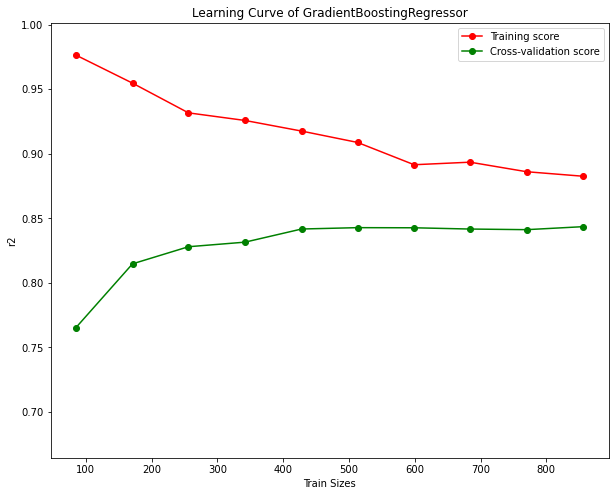

In [99]:
# Plot learning curve for the best model
fig, ax = plt.subplots(figsize=(10, 8))
plot_learning_curve(gb_reg, X_train, y_train, scoring="r2", ax=ax)

<hr>
<h3>Models Performance After Hyper Parameter</h3>
<hr>

In [100]:
# Predicting the Test set results
gb_y_pred = gb_reg.predict(X_test)

Creating a baseline model for refrence

In [101]:
steps[STEP_LEN] = ("model", TransformedTargetRegressor(
            regressor=DummyRegressor(),
            func=np.log1p,
            inverse_func=np.expm1,
            ),
        )

# Create the pipeline
dummy = Pipeline(steps=steps)
dummy.fit(X_train, y_train)

# Predicting the Test set results
dummy_y_pred = dummy.predict(X_test)

In [102]:
# Calculating score for gradient boosting regressor
print("Gradient Boosting Regressor: \n")
print(f"R2 score of the Gradient Boosting Regressor is {r2_score(y_test, gb_y_pred)}")
print(f"RMSE score of the Gradient Boosting Regressor is {mean_squared_error(y_test, gb_y_pred, squared=False)}")
print(f"MAE score of the Gradient Boosting Regressor is {mean_absolute_error(y_test, gb_y_pred)}")

print('\n' + '-'*100 + '\n')

# Calculating score for dummy regressor
print("DummyRegressor: \n")
print(f"R2 score is {r2_score(y_test, dummy_y_pred)}")
print(f"RMSE score is {mean_squared_error(y_test, dummy_y_pred, squared=False)}")
print(f"MAE score of is {mean_absolute_error(y_test, dummy_y_pred)}")

Gradient Boosting Regressor: 

R2 score of the Gradient Boosting Regressor is 0.8701102667381173
RMSE score of the Gradient Boosting Regressor is 4490.569710260837
MAE score of the Gradient Boosting Regressor is 2082.710714187068

----------------------------------------------------------------------------------------------------

DummyRegressor: 

R2 score is -0.09759086093142555
RMSE score is 13053.719349540474
MAE score of is 8603.157345459442


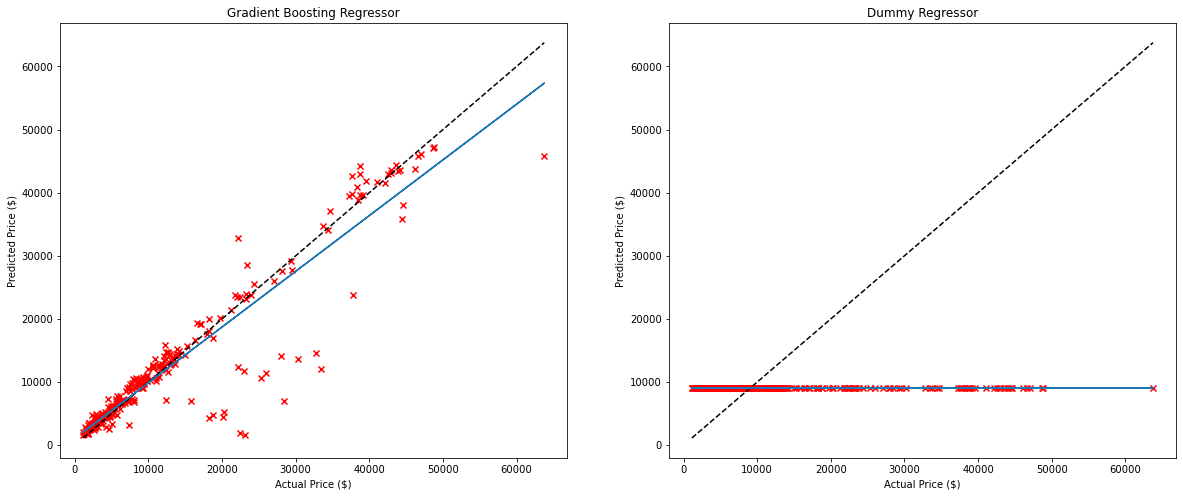

In [103]:
# Plotting the gradient boosting regressor
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].scatter(y_test, gb_y_pred, color="red", marker="x")
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
m, b = np.polyfit(y_test, gb_y_pred, 1)
ax[0].plot(y_test, m*y_test + b)
ax[0].set_xlabel("Actual Price ($)")
ax[0].set_ylabel("Predicted Price ($)")
ax[0].set_title("Gradient Boosting Regressor")

# Plotting the dummy regressor
ax[1].scatter(y_test, dummy_y_pred, color="red", marker="x")
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
m, b = np.polyfit(y_test, dummy_y_pred, 1)
ax[1].plot(y_test, m*y_test + b)
ax[1].set_xlabel("Actual Price ($)")
ax[1].set_ylabel("Predicted Price ($)")
ax[1].set_title("Dummy Regressor")

plt.show()

In [124]:
gb_reg[-1].regressor_.feature_importances_

array([2.57718807e-03, 3.68463903e-03, 6.50989015e-03, 1.67299224e-03,
       1.80910283e-03, 3.09448857e-03, 2.65412063e-01, 2.43744950e-01,
       4.14081295e-01, 4.18778100e-02, 3.14973044e-06, 1.51429691e-03,
       1.40181352e-02])

In [111]:
X_training.columns

Index(['Age', 'BMI', 'UnderWeight', 'OverWeight', 'Obease', 'Gender_male',
       'Region_northwest', 'Region_southeast', 'Region_southwest',
       'Smoker_yes'],
      dtype='object')

In [126]:
print(len(gb_reg[-1].regressor_.feature_importances_))
print(len(X_training.columns))


13
10


In [131]:
type(y_test)

pandas.core.series.Series

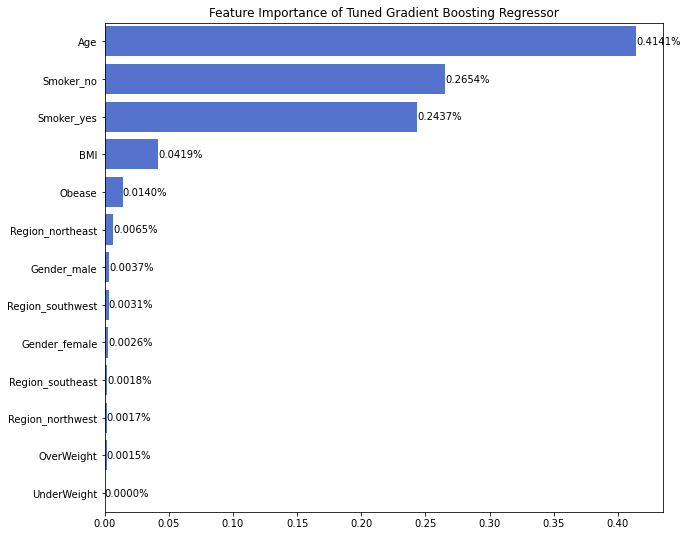

In [135]:
# Calculate the feature importances
importances = gb_reg[-1].regressor_.feature_importances_
X_col = pd.Series(Pipeline(steps=steps[:-1]).fit(X_train, y_train)[-1].get_feature_names_out()).apply(lambda x: x.split("__")[1])
# Create a Pandas Series with corrected feature importances
importance = pd.Series(importances, X_col).sort_values(ascending=False)


# Create plot
fig, ax = plt.subplots(figsize=(10, 9))

sns.barplot(
    x=importance[importance > 0].values, 
    y=importance[importance > 0].index,  
    ax=ax,
    color="royalblue" 
)

# Format the plot
ax.set_title("Feature Importance of Tuned Gradient Boosting Regressor")
for i in ax.containers:
    ax.bar_label(i, fmt = '%.4f%%')

# Show plot
plt.show()